In [1]:
# Libraries that this notebook will use:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
from datascience import *
from matplotlib.colors import ListedColormap
import re
# Helps the maps display nicely in the notebook:
%matplotlib inline
plt.rcParams['figure.figsize'] = [30, 20]
# Tells the notebook not to display warnings:
import warnings
warnings.filterwarnings('ignore')
from IPython.display import IFrame

# HOLC areas
**We have data for these areas in California: Fresno, Los Angeles, San Francisco, San Jose, Stockton, San Diego, Oakland.**

In [2]:
from matplotlib.colors import ListedColormap

# Create a ListedColormap object called holc_cmap, pass in the list of colors
holc_cmap = ListedColormap(['green', 'blue', 'yellow', 'red'], name='holc_colors')

# San Francisco

In [4]:
sf = gpd.read_file('holc_sf')
census2000 = gpd.read_file("census2000")

AREA  PERIMETER  TR06_D00_  TR06_D00_I STATE COUNTY   TRACT     NAME  \
0  0.058290   1.303878          2           1    06    093    0004     0004   
1  0.155340   2.227876          3           2    06    093    0003     0003   
2  0.346458   3.272025          4           3    06    093    0005     0005   
3  0.148798   2.018557          5           4    06    093    0002     0002   
4  0.227852   3.327617          6           5    06    015  000202  0002.02   

  LSAD LSAD_TRANS                                           geometry  
0   TR       None  POLYGON ((-122.87032 42.00331, -122.80008 42.0...  
1   TR       None  POLYGON ((-122.36818 42.00932, -122.28953 42.0...  
2   TR       None  POLYGON ((-123.23076 42.00384, -123.19236 42.0...  
3   TR       None  POLYGON ((-122.16133 42.00764, -122.16044 42.0...  
4   TR       None  POLYGON ((-124.21161 41.99846, -124.12619 41.9...

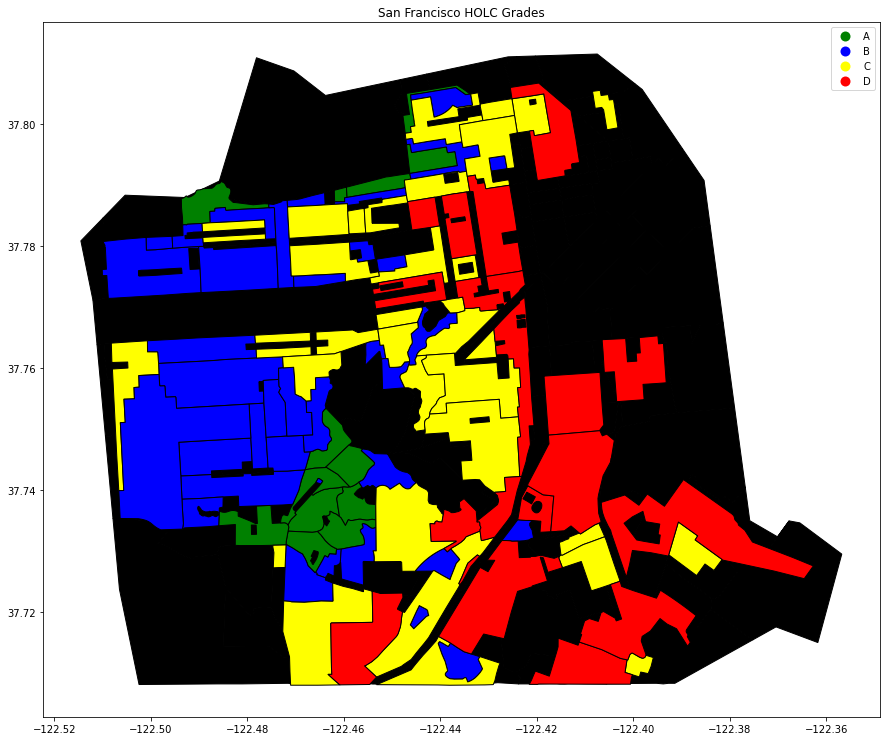

In [12]:
sf_county_1 = census2000[census2000['COUNTY']=='075']

geometries_str = sf_county_1['geometry'].apply(lambda x: x.wkt).values
sf_county_2 = sf_county_1[['-123' not in i for i in geometries_str]]

geometries_str_2 = sf_county_2['geometry'].apply(lambda x: x.wkt).values
sf_county_3 = sf_county_2[['37.82' not in i for i in geometries_str_2]]
base = sf_county_3.plot(figsize=(15, 15), color='black')

sf = gpd.read_file('holc_sf')
sf.plot(ax =base, column = 'holc_grade', cmap = holc_cmap, legend = True, figsize=[18, 10])
plt.title('San Francisco HOLC Grades');
# plt.axis('off');

In [6]:
# ! pip install osmnx

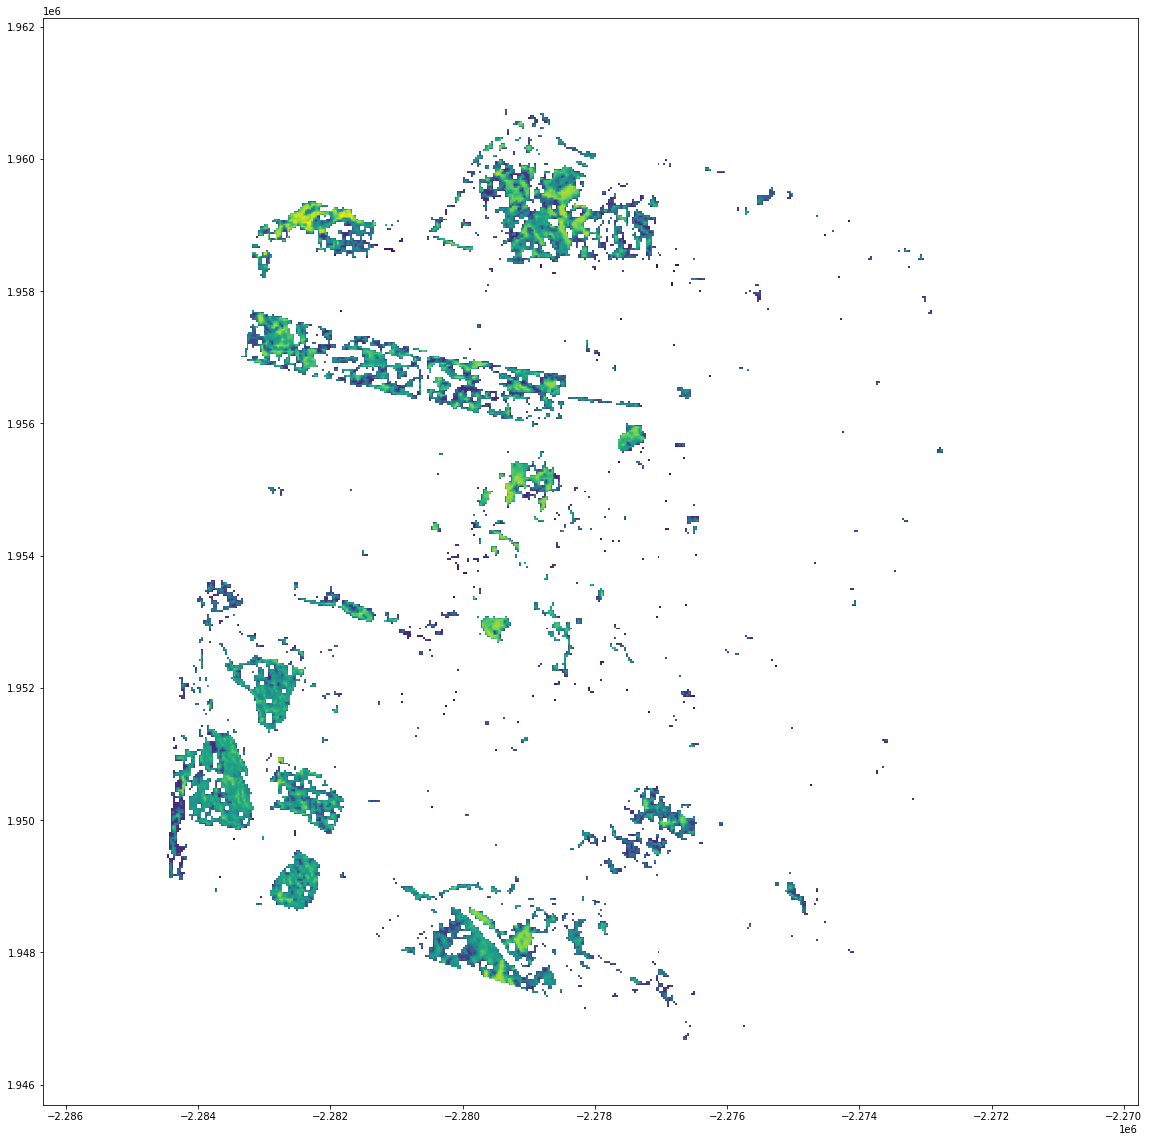

<AxesSubplot:>

In [13]:
import rasterio
from rasterio.plot import show
from rasterstats import zonal_stats
import osmnx as ox
import os

# File path
data_dir = "CA_trees2016"
dem_fp = os.path.join(data_dir, "2016_tree_canopy_SF.tif")

# Read the Digital Elevation Model for Helsinki
dem = rasterio.open(dem_fp)
show(dem)


# **https://rasterio.readthedocs.io/en/latest/topics/plotting.html**

# Keywords for Kallio and Helsinki in such format that they can be found from OSM
sf_query = "Kallio, Helsinki, Finland"

# Retrieve the geometries of those areas using osmnx
sf_place = ox.gdf_from_place(kallio_q)

# Reproject to same coordinate system as the
sf_place = sf_place.to_crs(crs=dem.crs)

type(sf_place)

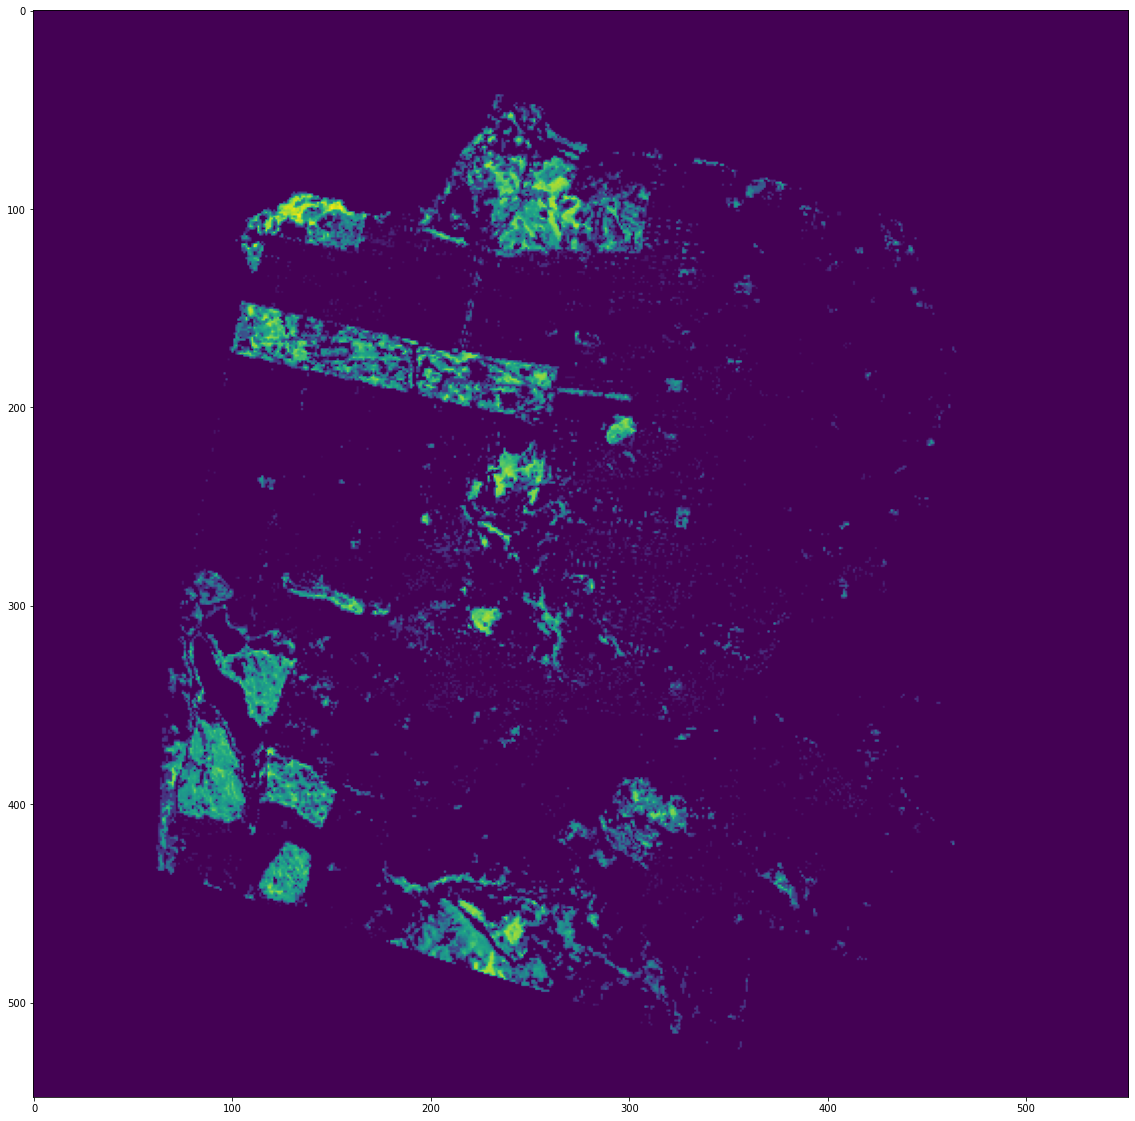

In [56]:
import rasterio
src = rasterio.open("CA_trees2016/2016_tree_canopy_SF.tif")
plt.imshow(src.read(1))
plt.show()

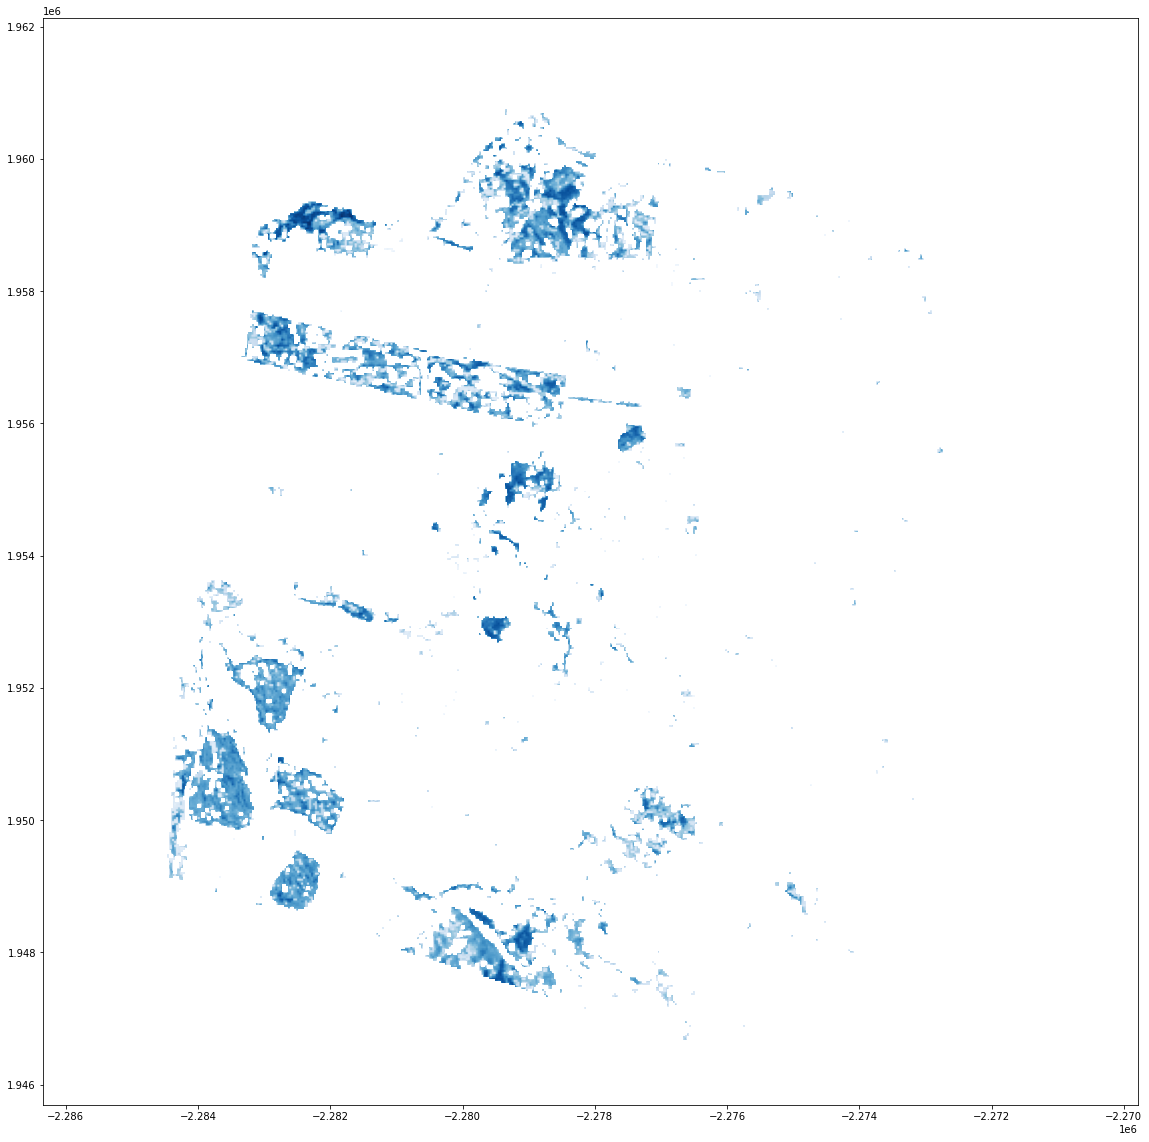

In [11]:
# from rasterio.plot import show
# base = sf_county_3.plot(figsize=(15, 15), color='black')
# sf.plot(ax =base, column = 'holc_grade', cmap = holc_cmap, legend = True, figsize=[18, 10])
# plt.title('San Francisco HOLC Grades')
# plt.show()

show(src, cmap='Blues')
plt.show()

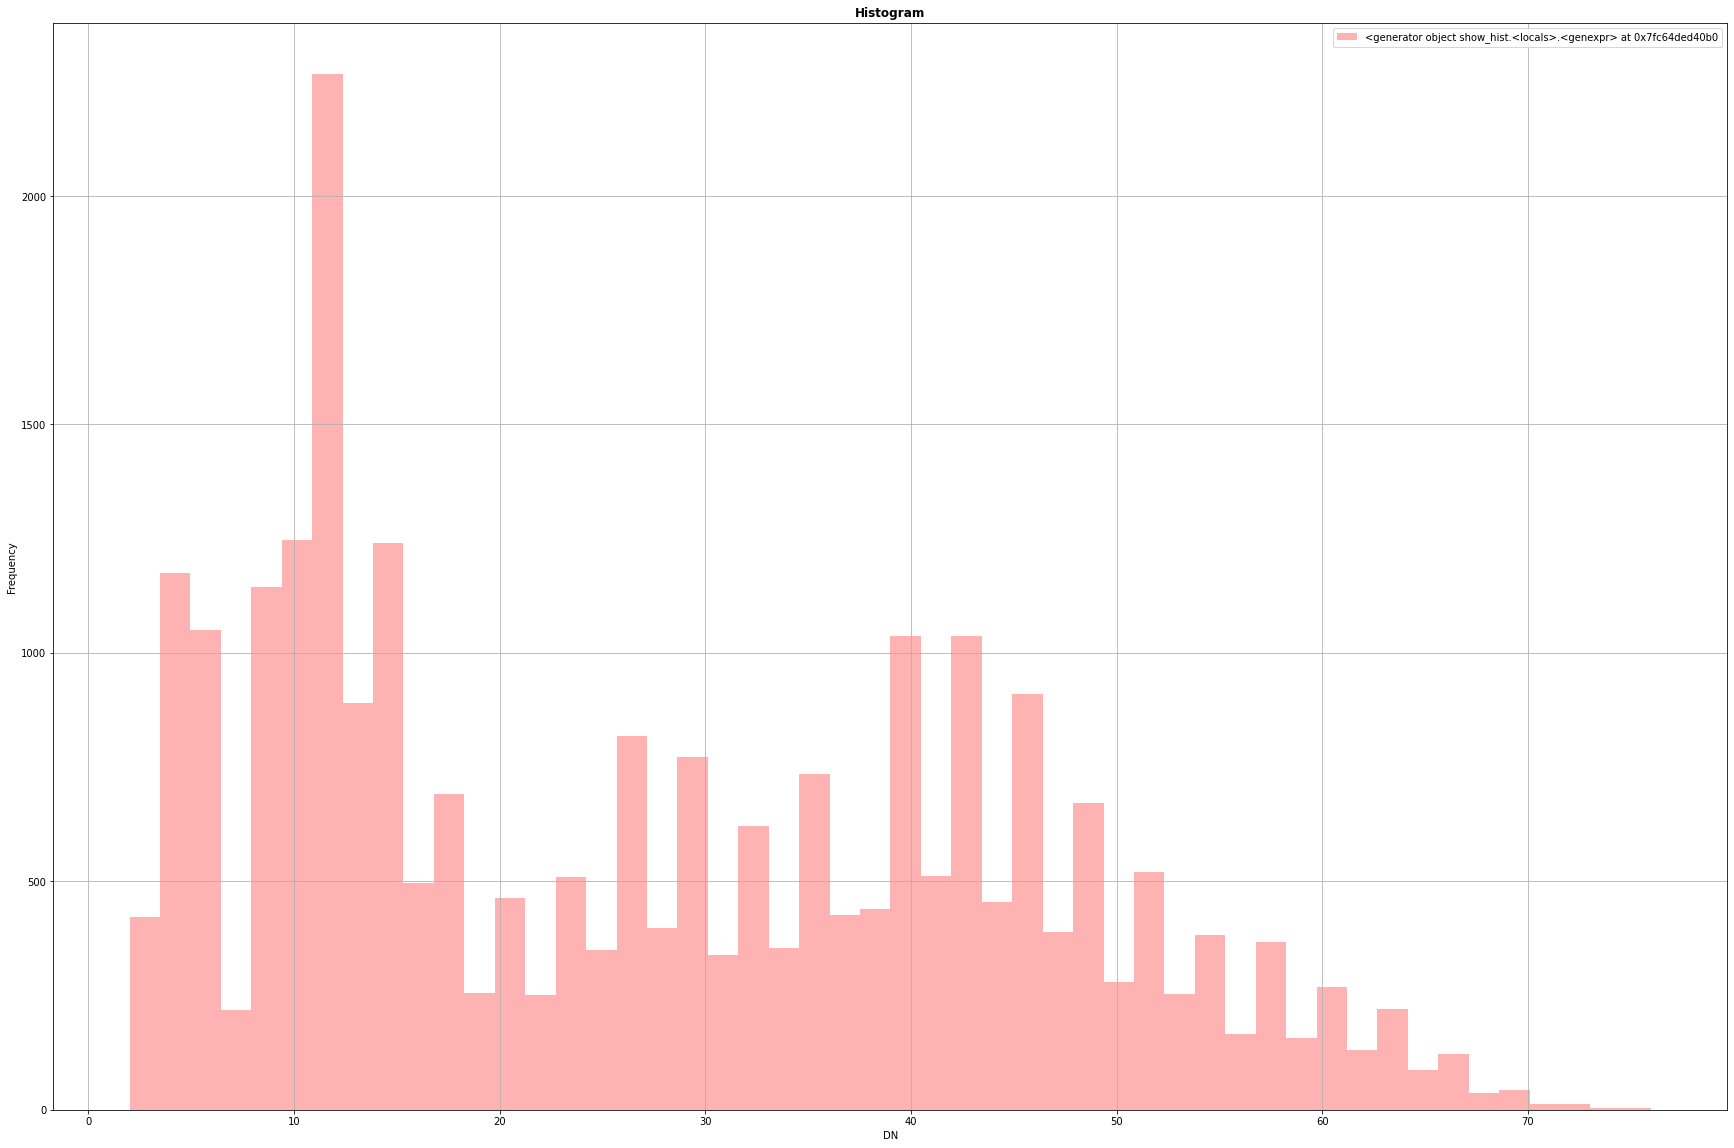

In [14]:
from rasterio.plot import show_hist
show_hist(src, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="Histogram")

<AxesSubplot:>

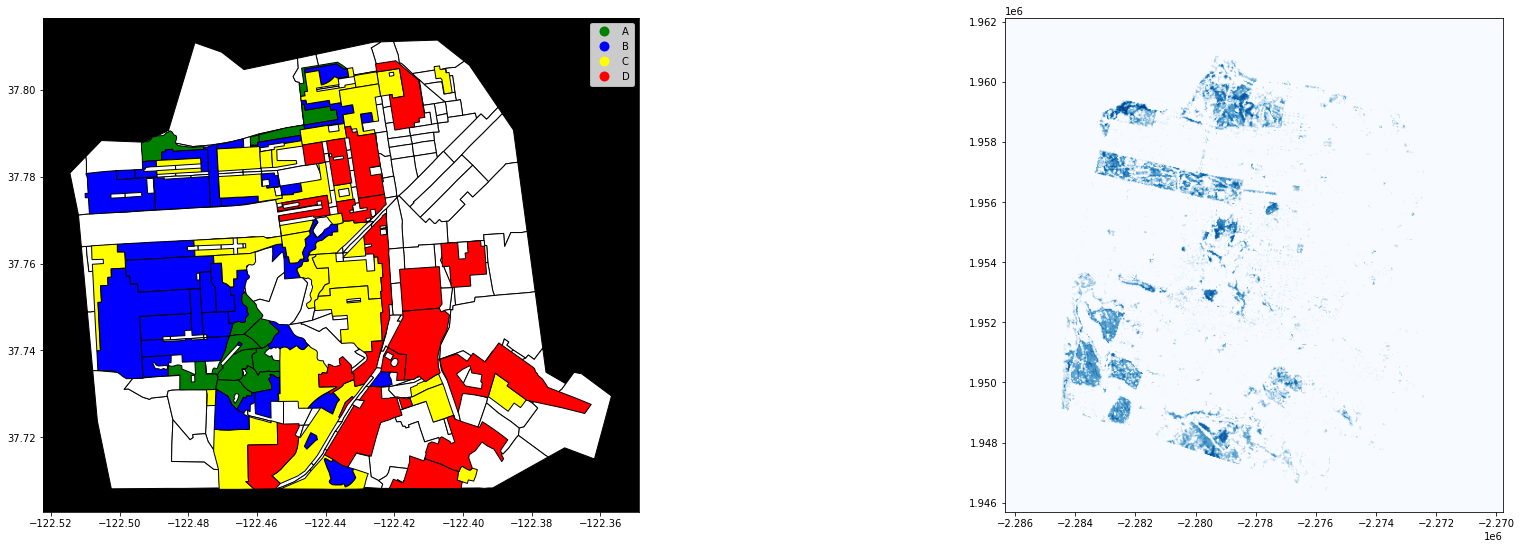

In [10]:
fig = plt.figure()

ax1=plt.subplot(2, 2, 1)
ax1.set_facecolor('black')

ax2=plt.subplot(2, 2, 2)
ax2.set_facecolor('white')

base = sf_county_3.plot(ax = ax1,figsize=(15, 15), color='white')
sf.plot(ax =ax1, column = 'holc_grade', cmap = holc_cmap, legend = True, figsize=[18, 10])
show((src, 1), cmap='Blues', ax=ax2)
# show(src, ax=base, cmap='Blues')


Reference code: 
https://github.com/mapbox/rasterio/blob/fb93a6425c17f25141ad308cee7263d0c491a0a9/examples/rasterio_polygonize.py

In [57]:
# import rasterio
from rasterio.features import shapes
mask = None
# with rasterio.drivers():
with rasterio.open("CA_trees2016/2016_tree_canopy_SF.tif") as src:
    image = src.read(1) # first band
    results = (
    {'properties': {'raster_val': v}, 'geometry': s}
    for i, (s, v) 
    in enumerate(
        shapes(image, mask=mask, transform=src.transform)))

In [30]:
import geopandas as gpd

In [58]:
geoms = list(results)
# first feature
gpd_polygonized_raster  = gpd.GeoDataFrame.from_features(geoms)
print(geoms[0])
# gpd_polygonized_raster

{'properties': {'raster_val': 17.0}, 'geometry': {'type': 'Polygon', 'coordinates': [[(-2279355.0, 1960845.0), (-2279355.0, 1960785.0), (-2279325.0, 1960785.0), (-2279325.0, 1960845.0), (-2279355.0, 1960845.0)]]}}


geometry  raster_val
0      POLYGON ((-2279355.000 1960845.000, -2279355.0...        17.0
1      POLYGON ((-2279325.000 1960845.000, -2279325.0...        28.0
2      POLYGON ((-2279295.000 1960845.000, -2279295.0...        15.0
3      POLYGON ((-2279265.000 1960845.000, -2279265.0...        14.0
4      POLYGON ((-2279295.000 1960815.000, -2279295.0...        14.0
5      POLYGON ((-2279325.000 1960815.000, -2279325.0...         0.0
6      POLYGON ((-2279355.000 1960785.000, -2279355.0...        15.0
7      POLYGON ((-2279295.000 1960785.000, -2279295.0...        12.0
8      POLYGON ((-2279385.000 1960755.000, -2279385.0...        21.0
9      POLYGON ((-2279355.000 1960755.000, -2279355.0...        24.0
10     POLYGON ((-2279325.000 1960755.000, -2279325.0...        13.0
11     POLYGON ((-2279385.000 1960725.000, -2279385.0...        27.0
12     POLYGON ((-2279055.000 1960725.000, -2279055.0...        14.0
13     POLYGON ((-2278935.000 1960725.000, -2278935.0...        15.0
14     POLYGON ((-2279415.000 1960695.000, -2279415.0...        10.0
15     POLYGON ((-2279385.000 1960695.000, -2279385.0...        36.0
16     POLYGON ((-2279355.000 1960695.000, -2279355.0...        15.0
17     POLYGON ((-2279085.000 1960695.000, -2279085.0...        19.0
18     POLYGON ((-2278845.000 1960695.000, -2278845.0...        13.0
19     POLYGON ((-2278815.000 1960695.000, -2278815.0...        39.0
20     POLYGON ((-2278785.000 1960695.000, -2278785.0...        38.0
21     POLYGON ((-2279355.000 1960665.000, -2279355.0...        23.0
22     POLYGON ((-2279325.000 1960665.000, -2279325.0...        11.0
23     POLYGON ((-2279055.000 1960665.000, -2279055.0...        32.0
24     POLYGON ((-2278995.000 1960665.000, -2278995.0...         9.0
25     POLYGON ((-2278965.000 1960665.000, -2278965.0...        13.0
26     POLYGON ((-2278935.000 1960665.000, -2278935.0...         9.0
27     POLYGON ((-2278845.000 1960665.000, -2278845.0...        16.0
28     POLYGON ((-2278815.000 1960665.000, -2278815.0...        35.0
29     POLYGON ((-2278785.000 1960665.000, -2278785.0...        17.0
30     POLYGON ((-2278725.000 1960665.000, -2278725.0...         9.0
31     POLYGON ((-2278695.000 1960665.000, -2278695.0...        18.0
32     POLYGON ((-2279385.000 1960635.000, -2279385.0...        12.0
33     POLYGON ((-2279295.000 1960635.000, -2279295.0...        14.0
34     POLYGON ((-2279055.000 1960635.000, -2279055.0...        10.0
35     POLYGON ((-2279025.000 1960635.000, -2279025.0...        11.0
36     POLYGON ((-2278995.000 1960635.000, -2278995.0...        14.0
37     POLYGON ((-2278965.000 1960635.000, -2278965.0...        30.0
38     POLYGON ((-2278935.000 1960635.000, -2278935.0...        13.0
39     POLYGON ((-2278905.000 1960635.000, -2278905.0...        10.0
40     POLYGON ((-2278755.000 1960635.000, -2278755.0...        16.0
41     POLYGON ((-2278725.000 1960635.000, -2278725.0...        10.0
42     POLYGON ((-2278695.000 1960635.000, -2278695.0...         0.0
43     POLYGON ((-2278665.000 1960635.000, -2278665.0...        20.0
44     POLYGON ((-2279325.000 1960605.000, -2279325.0...        15.0
45     POLYGON ((-2279145.000 1960605.000, -2279145.0...        15.0
46     POLYGON ((-2279025.000 1960605.000, -2279025.0...        10.0
47     POLYGON ((-2278995.000 1960605.000, -2278995.0...         9.0
48     POLYGON ((-2278965.000 1960605.000, -2278965.0...        11.0
49     POLYGON ((-2278935.000 1960605.000, -2278935.0...        31.0
50     POLYGON ((-2278905.000 1960605.000, -2278905.0...        13.0
51     POLYGON ((-2278875.000 1960605.000, -2278875.0...        12.0
52     POLYGON ((-2278815.000 1960605.000, -2278815.0...        16.0
53     POLYGON ((-2278785.000 1960605.000, -2278785.0...        29.0
54     POLYGON ((-2278755.000 1960605.000, -2278755.0...        33.0
55     POLYGON ((-2278725.000 1960605.000, -2278725.0...        29.0
56     POLYGON ((-2278695.000 1960605.000, -2278695.0...         9.0
57     POLYGON ((-2279235.000 1960575.000, -22

<AxesSubplot:>

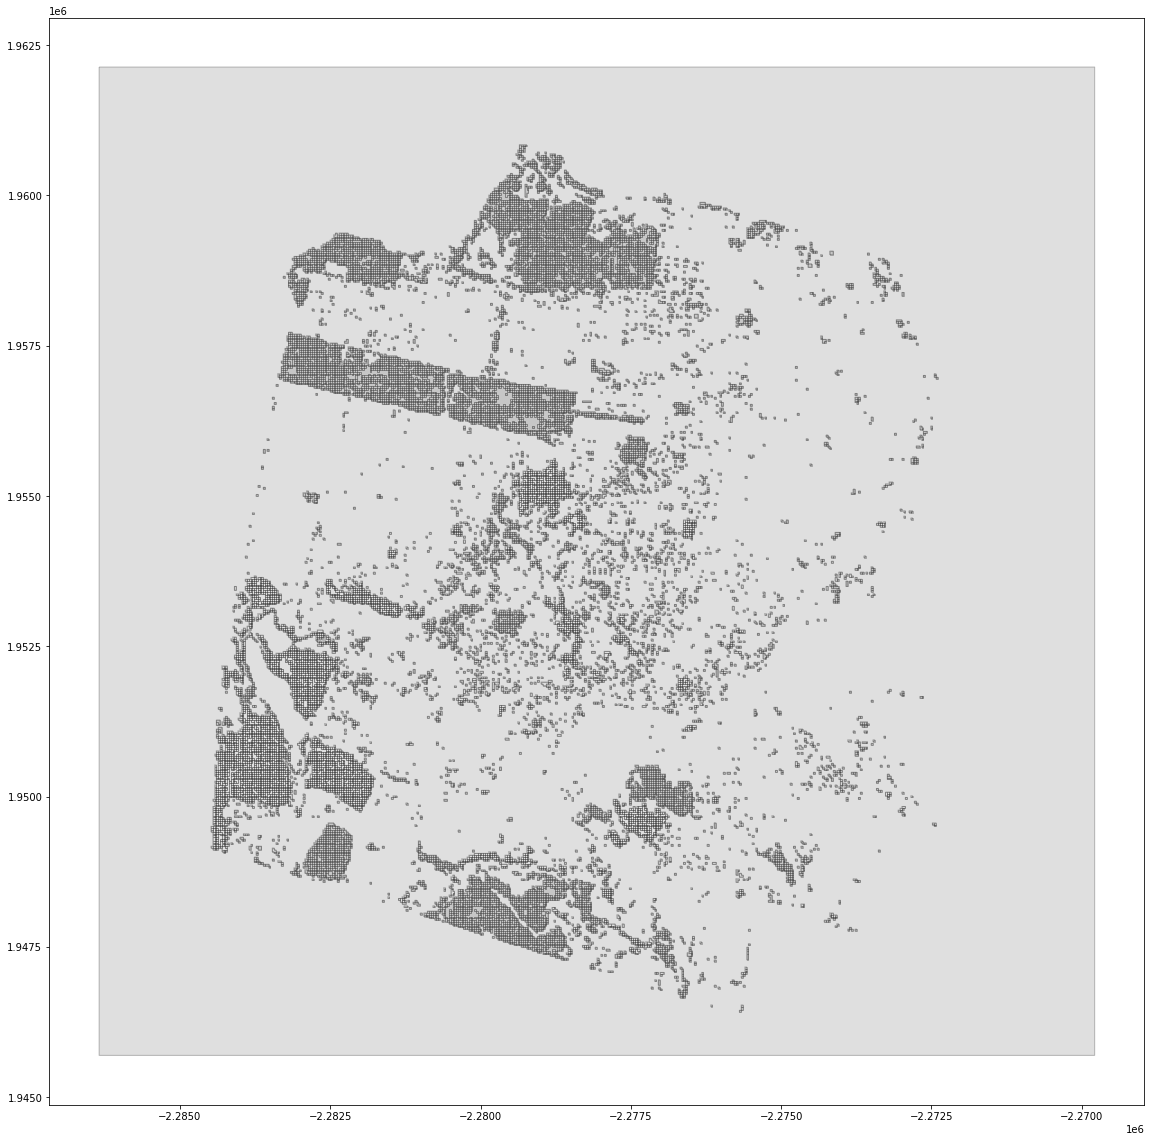

In [34]:
gpd_polygonized_raster.plot(facecolor='grey', alpha=0.25)

# 2279355.000

In [59]:
rotated = gpd_polygonized_raster['geometry'].rotate(10)
copied_gpd = gpd_polygonized_raster.copy()
copied_gpd['geometry'] = rotated

# rotated
copied_gpd.head()#.plot(facecolor='grey', alpha=0.25)

geometry  raster_val
0  POLYGON ((-2279359.982 1960841.940, -2279349.5...        17.0
1  POLYGON ((-2279327.377 1960842.167, -2279322.1...        28.0
2  POLYGON ((-2279297.377 1960842.167, -2279292.1...        15.0
3  POLYGON ((-2279267.377 1960842.167, -2279262.1...        14.0
4  POLYGON ((-2279297.377 1960812.167, -2279292.1...        14.0

<AxesSubplot:>

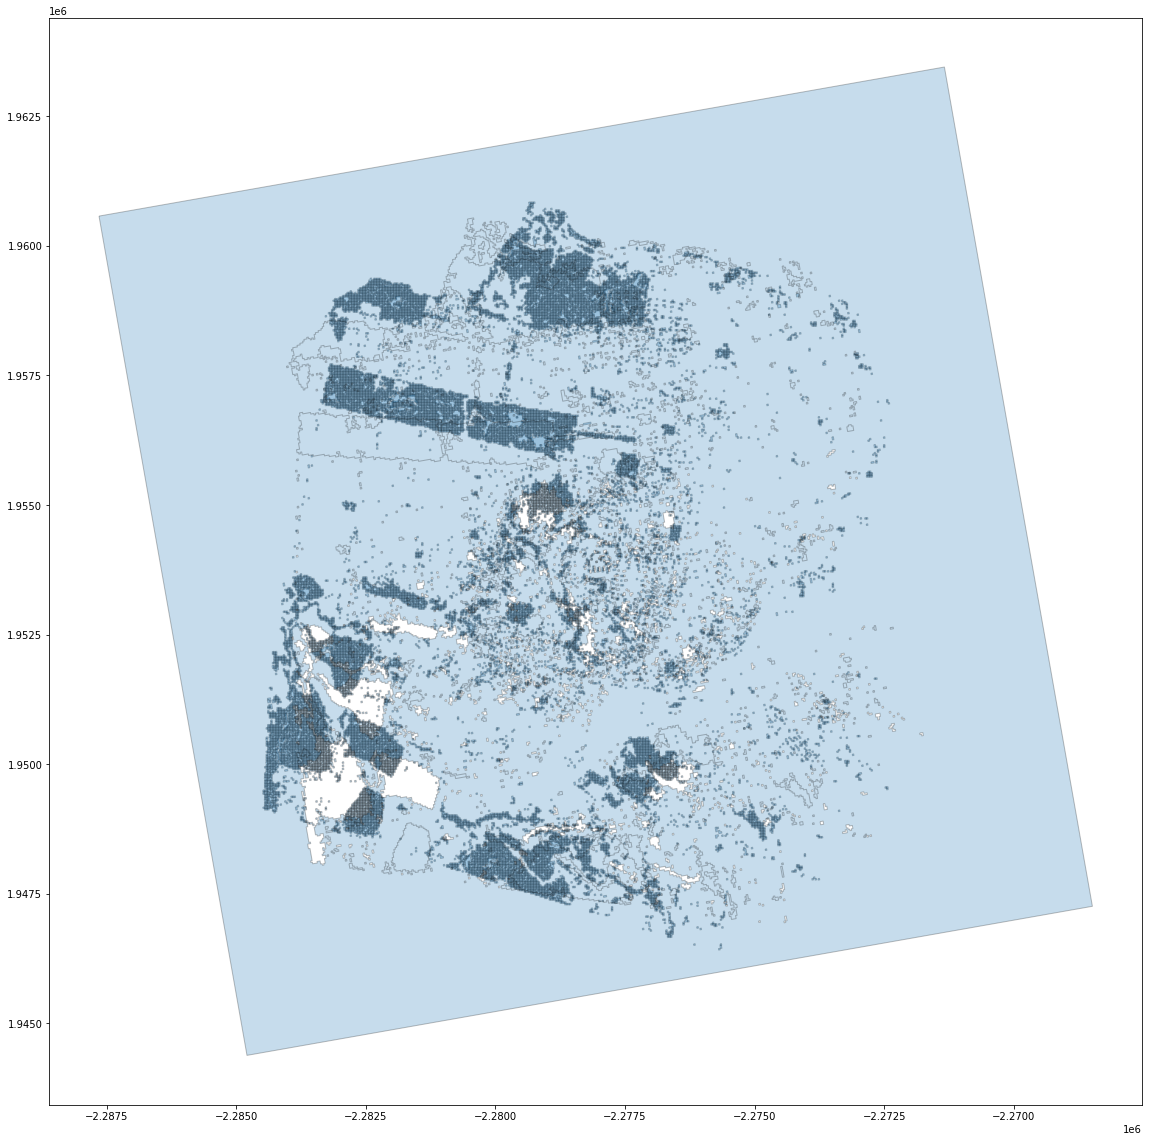

In [61]:
copied_gpd.plot(alpha=0.25)

<AxesSubplot:>

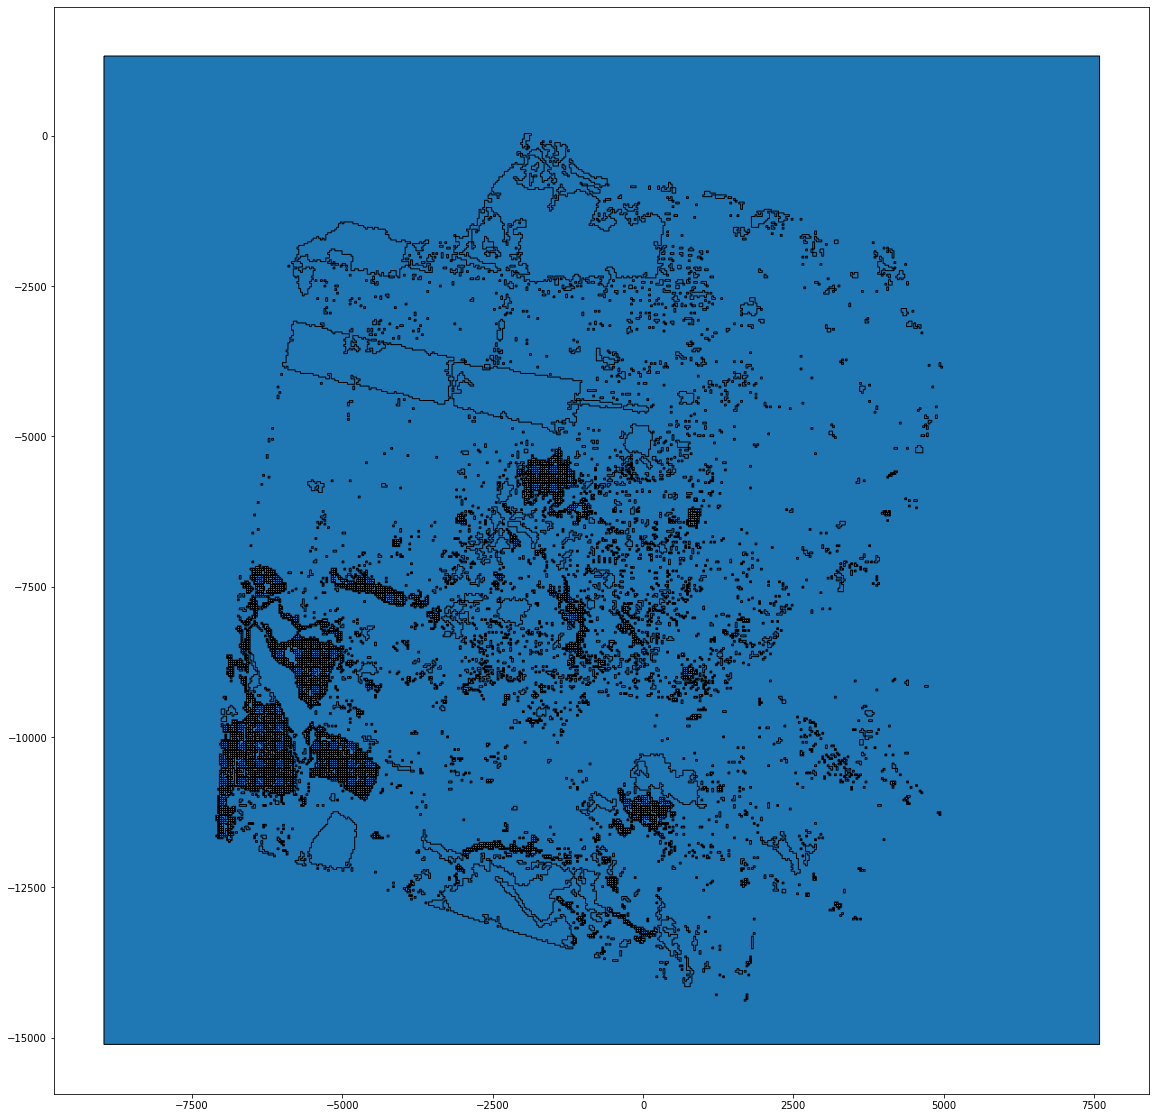

In [89]:
# scale_sf = 
gpd_polygonized_raster['geometry'].translate(xoff=2277378.0, yoff=-x, zoff=0.0).plot()
# transform_sf.plot()

In [ ]:
.scale(xfact=0.05, yfact=0.05, zfact=0.0).

In [76]:
# from shapely.geometry import Point
# -2279355 1960845
-2277500 + 122

-2277378

In [73]:
1960845 - 35

1960810

In [ ]:
2,280,000

In [ ]:
10K across